In [20]:
import os
import pandas as pd
from pathlib import Path
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Utils

In [21]:
class Utils():
    def __init__(self) -> None:
        pass

    # Define a function to parse the text line into class and features
    def parse_line(self, line):
        parts = line.strip().split()
        class_label = int(parts[0])
        features = {}
        for part in parts[1:]:
            match = re.match(r'(\d+):([\d.]+)', part)
            if match:
                feature_id, feature_value = map(float, match.groups())
                features[int(feature_id)] = feature_value
        return {"class": class_label, **features}

    def load_data_txt(self, file_name: str) -> pd.DataFrame:
       # Construct the full file path
        parsed_path = os.path.join(
            Path().resolve().parent, "data", file_name)

        # Read the text file into a list of lines
        data_list = []
        with open(parsed_path, 'r') as file:
            for line in file:
                data_list.append(self.parse_line(line))

        # Convert the list of dictionaries into a pandas DataFrame
        df = pd.DataFrame(data_list)

        return df
    
    def load_data_csv(self, file_name: str) -> pd.DataFrame:
       # Construct the full file path
        parsed_path = os.path.join(
            Path().resolve().parent, "data", file_name)

        df = pd.read_csv(parsed_path)

        return df


# Plots 

In [42]:
class PlotService():
    def __init__(self) -> None:
        pass

    def plot_correlations(self, input_data, target_column = None):
        data = input_data.copy()
        
        if target_column == None:
            correlation_matrix = data.corr()
            plt.figure(figsize=(8, 6))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
            plt.title('Correlation Heatmap')
            plt.show()
            return
            
        else:
            
            # Calculate the correlations between specific columns and the target column
            correlations = data.drop(columns=target_column).corrwith(data[target_column])
            
            # Create a DataFrame for correlations
            correlation_df = pd.DataFrame({'Correlation': correlations})
            
            # Sort by absolute correlation value (optional)
            correlation_df = correlation_df.abs().sort_values(by='Correlation', ascending=False)
            
            # Plot the correlations using a bar plot and annotate the bars with values
            plt.figure(figsize=(8, 6))
            ax = sns.barplot(x=correlation_df.index, y=correlation_df['Correlation'], palette='coolwarm')
            plt.title(f'Correlations with {target_column}')
            plt.xticks(rotation=45)
            plt.xlabel('Columns')
            plt.ylabel('Correlation')
            
            # Annotate the bars with correlation values
            for i, v in enumerate(correlation_df['Correlation']):
                ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')
                
            plt.show()


        

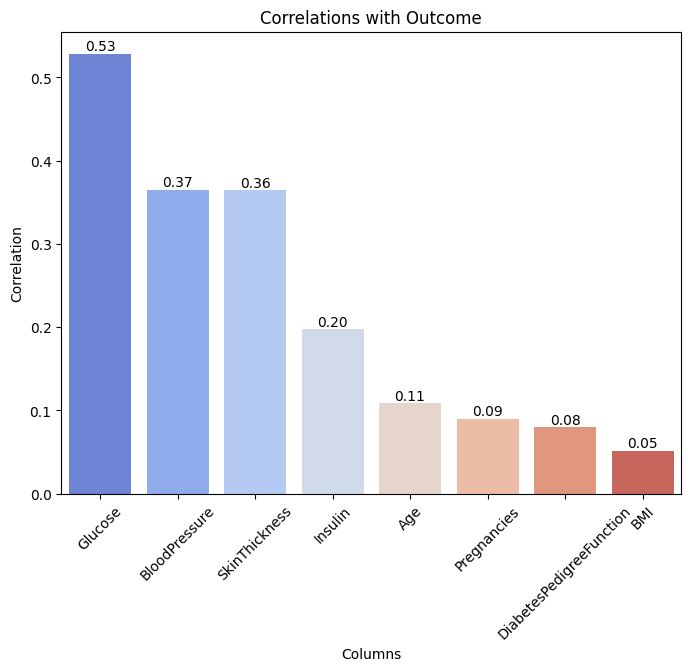

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [43]:

def main():
    utils = Utils()
    plot_service = PlotService()

    file_name_txt = "diabetes_pre_processed.txt"
    file_name_csv = "diabetes.csv"
    data = utils.load_data_csv(file_name_csv)


    # Calculate the correlation between 'AnotherColumn' and other columns
    correlation = data.corr()

    # plot_service.plot_correlations(correlation)
    plot_service.plot_correlations(correlation, "Outcome")
    
    print(correlation)
    return


if __name__ == "__main__":
    main()